# Sequence Logo from a Multiple Sequence Alignment (MSA)

### In this notebook it is shown how to generate a sequence logo from a MSA. First we have to retrieve a matrix storing the frequencies of each amino acid in each position of our MSA, then we can use already available libraries for building our sequence logo.

In [1]:
import numpy as np
import pandas as pd
import logomaker
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import font_manager
from matplotlib import rc,rcParams
import cv2

#### First we have to upload our MSA file in fasta format. We can check our file with this simple for loop

In [2]:
MSA = open('/home/ilkka/Desktop/PerIco/Predictor/Dataset/PeroProteinsMTS/PPMTS_64_C-terminal_30res.fasta')

#### Then we can build a MSA matrix represented as a list of strings where each string contains one sequence

In [3]:
#the function takes in input a Multiple sequence alignment and return a matrix represented as a list of strings
#where each string represent a sequence
def MSA_matrix(MSA):
    L=[]
    for line in MSA:
        if len(line) > 12: #remove the ids
            L.append(line.rstrip())
    return L

In [4]:
MSA = open('/home/ilkka/Desktop/PerIco/Predictor/Dataset/PeroProteinsMTS/PPMTS_64_C-terminal_30res.fasta')
MSA_matrix = MSA_matrix(MSA)
lenght_of_seq=len(MSA_matrix[0])

#This is a decomposed version, where each letter is separeted
MSA_matrix_decomposed=[]
for seq in range(0,len(MSA_matrix)):
    MSA_matrix_decomposed.append([])
    for letter in range(0,len(MSA_matrix[seq])):
        MSA_matrix_decomposed[seq].append(MSA_matrix[seq][letter])
num_seq=len((MSA_matrix)) 

#### The total count for each aminoacid can be computed in this way and represented as a dictionary

In [5]:
protein_alphabet=['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
protein_extended_alphabet=['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y','B','Z','-']
DNA_alphabet = ['A','C','T','G','-']
RNA_alphabet = ['A','C','U','G','-']
D={'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'H':0,'I':0,'K':0,'L':0,'M':0,'N':0,'P':0,'Q':0,'R':0,'S':0,'T':0,'V':0,'W':0,'Y':0,'Z':0,'-':0}


for seq in range(0,len(MSA_matrix_decomposed)):
    for aminoacids in range(0,len(MSA_matrix_decomposed[seq])):
        for letters in protein_alphabet:
            if letters == MSA_matrix_decomposed[seq][aminoacids]:
                D[letters]=D[letters]+1
print('Total count:',D)                

Total count: {'A': 152, 'B': 0, 'C': 20, 'D': 83, 'E': 126, 'F': 73, 'G': 113, 'H': 44, 'I': 101, 'K': 165, 'L': 227, 'M': 39, 'N': 77, 'P': 90, 'Q': 65, 'R': 110, 'S': 154, 'T': 80, 'V': 123, 'W': 32, 'Y': 46, 'Z': 0, '-': 0}


### Now we can start builing our frequency matrix:

In [6]:
def init_empty_dict(symbols):
    dictionary = {}
    for symbol in symbols:
        dictionary[symbol] = 0
    return dictionary

In [7]:
def init_emtpy_listofdict(MSA_matrix):
    dictionaries_list = []
    for pos in range(len(MSA_matrix[0])):
        dictionaries_list.append(init_empty_dict(protein_extended_alphabet))
    return dictionaries_list

In [8]:
#We can start initializing a list of dictionaries
dictionaries_list = init_emtpy_listofdict(MSA_matrix)
#print(dictionaries_list)                    

In [9]:
def PCM(MSA_matrix,dictionaries_list):
    for pos in range(len(MSA_matrix[0])):
        for seq in MSA_matrix:
            old_count = dictionaries_list[pos][seq[pos]]
            dictionaries_list[pos][seq[pos]] = old_count+1
    return dictionaries_list

In [10]:
#Position count matrix represented as a list of dictionaries where each dictionary represent a position in our MSA. 
#The keys are the aminoacids and the values represent how many time the aminoacid is found in that position.
dictionaries_list=PCM(MSA_matrix,dictionaries_list)
#print(dictionaries_list)          

In [11]:
#Let's convert it for a nicer representation
dl = pd.DataFrame(dictionaries_list)
mymatrix = dl.values
dl

,A,C,D,E,F,G,H,I,K,L,...,Q,R,S,T,V,W,Y,B,Z,-
0,3,0,7,8,4,2,0,4,4,10,...,1,3,3,5,6,1,0,0,0,0
1,4,1,3,6,2,5,3,2,2,5,...,2,1,4,4,6,1,5,0,0,0
2,5,0,4,3,4,3,0,2,6,5,...,3,6,3,1,2,2,4,0,0,0
3,6,0,5,3,1,9,1,2,3,4,...,6,6,4,2,7,0,2,0,0,0
4,10,0,3,3,1,5,2,3,3,7,...,1,1,3,2,6,1,3,0,0,0
5,3,0,7,4,2,2,3,5,4,11,...,1,3,4,2,6,0,2,0,0,0
6,5,0,2,5,4,5,0,3,8,11,...,1,2,4,4,4,1,0,0,0,0
7,6,1,3,4,2,5,2,3,4,3,...,1,4,7,3,7,1,2,0,0,0
8,5,2,3,4,5,4,1,1,2,4,...,2,1,6,2,7,3,2,0,0,0
9,5,0,3,4,1,6,1,2,6,5,...,1,3,5,3,5,3,1,0,0,0


In [12]:
def PPM(dictionaries_list):
    for pos in range(len(dictionaries_list)):
        for keys in dictionaries_list[pos]:
            dictionaries_list[pos][keys]=dictionaries_list[pos][keys]/num_seq
    return dictionaries_list

In [13]:
# If we want to convert the values in frequencies we should divide each number by the number of sequences.
dictionaries_list=PPM(dictionaries_list)
#print(dictionaries_list)

In [14]:
dl = pd.DataFrame(dictionaries_list)
mymatrix = dl.values
dl

,A,C,D,E,F,G,H,I,K,L,...,Q,R,S,T,V,W,Y,B,Z,-
0,0.046875,0.000000,0.109375,0.125000,0.062500,0.031250,0.000000,0.062500,0.062500,0.156250,...,0.015625,0.046875,0.046875,0.078125,0.093750,0.015625,0.000000,0.0,0.0,0.0
1,0.062500,0.015625,0.046875,0.093750,0.031250,0.078125,0.046875,0.031250,0.031250,0.078125,...,0.031250,0.015625,0.062500,0.062500,0.093750,0.015625,0.078125,0.0,0.0,0.0
2,0.078125,0.000000,0.062500,0.046875,0.062500,0.046875,0.000000,0.031250,0.093750,0.078125,...,0.046875,0.093750,0.046875,0.015625,0.031250,0.031250,0.062500,0.0,0.0,0.0
3,0.093750,0.000000,0.078125,0.046875,0.015625,0.140625,0.015625,0.031250,0.046875,0.062500,...,0.093750,0.093750,0.062500,0.031250,0.109375,0.000000,0.031250,0.0,0.0,0.0
4,0.156250,0.000000,0.046875,0.046875,0.015625,0.078125,0.031250,0.046875,0.046875,0.109375,...,0.015625,0.015625,0.046875,0.031250,0.093750,0.015625,0.046875,0.0,0.0,0.0
5,0.046875,0.000000,0.109375,0.062500,0.031250,0.031250,0.046875,0.078125,0.062500,0.171875,...,0.015625,0.046875,0.062500,0.031250,0.093750,0.000000,0.031250,0.0,0.0,0.0
6,0.078125,0.000000,0.031250,0.078125,0.062500,0.078125,0.000000,0.046875,0.125000,0.171875,...,0.015625,0.031250,0.062500,0.062500,0.062500,0.015625,0.000000,0.0,0.0,0.0
7,0.093750,0.015625,0.046875,0.062500,0.031250,0.078125,0.031250,0.046875,0.062500,0.046875,...,0.015625,0.062500,0.109375,0.046875,0.109375,0.015625,0.031250,0.0,0.0,0.0
8,0.078125,0.031250,0.046875,0.062500,0.078125,0.062500,0.015625,0.015625,0.031250,0.062500,...,0.031250,0.015625,0.093750,0.031250,0.109375,0.046875,0.031250,0.0,0.0,0.0
9,0.078125,0.000000,0.046875,0.062500,0.015625,0.093750,0.015625,0.031250,0.093750,0.078125,...,0.015625,0.046875,0.078125,0.046875,0.078125,0.046875,0.015625,0.0,0.0,0.0


### Now we can build our sequence logo using laready available libraries. In this case we are using Logomaker

In [15]:
# We can chose our set of color with a dictionary. Here the aminoacid are colored according to their charge

colors= {'A': 'cornflowerblue', 'B': 'grey', 'C': 'limegreen', 'D': 'gold', 'E': 'gold', 'F': 'plum', 'G': 'cornflowerblue', 'H': 'tab:orange', 'I': 'cornflowerblue', 'K': 'tab:orange', 'L': 'cornflowerblue', 'M': 'cornflowerblue', 'N': 'limegreen', 'P': 'limegreen', 'Q':'limegreen', 'R': 'tab:orange', 'S': 'limegreen', 'T': 'limegreen', 'V': 'cornflowerblue', 'W': 'plum', 'Y': 'plum', 'Z': 'grey', 'U':'grey','-':'grey'}

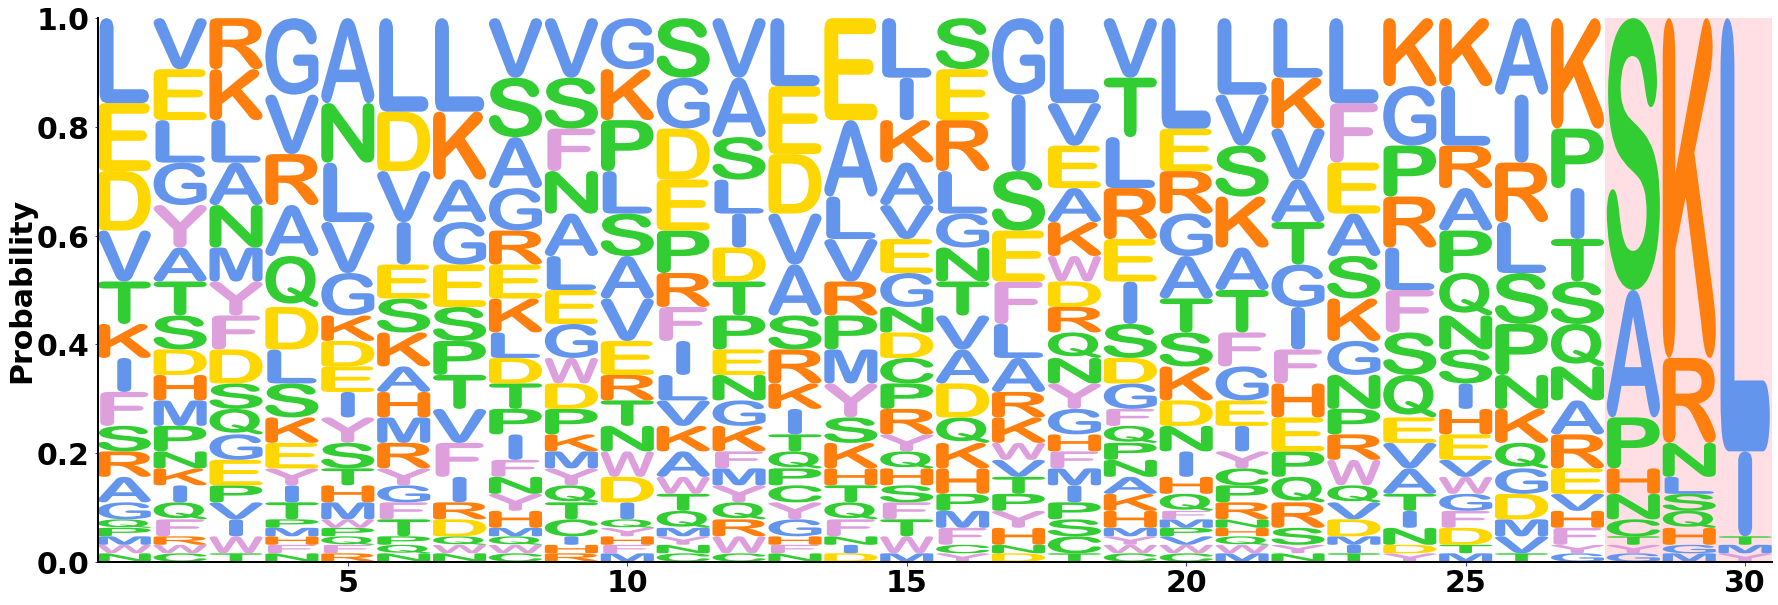

In [16]:

rc('font', weight='bold')
seq_logo=logomaker.Logo(dl,font_name='Arial Rounded MT Bold',color_scheme=colors,figsize=[30, 10])
seq_logo.ax.set_ylabel("Probability", labelpad=0, fontsize=30,fontweight='semibold')
seq_logo.style_spines(visible=False)
seq_logo.style_spines(spines=['left', 'bottom'], visible=True,linewidth=2)
seq_logo.style_xticks(anchor=-1, spacing=5)
seq_logo.ax.set_xticklabels([5,10,15,20,25,30])
seq_logo.ax.tick_params(axis="x", labelsize=30, color='b', grid_alpha=0)
seq_logo.ax.tick_params(labelbottom=bool,axis="y", labelsize=30, color='b', grid_alpha=0)
seq_logo.ax.yaxis.set_tick_params(pad=5)
seq_logo.highlight_position(p=27, color='pink', alpha=.5)
seq_logo.highlight_position(p=28, color='pink', alpha=.5)
seq_logo.highlight_position(p=29, color='pink', alpha=.5)